In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold,StratifiedKFold


## Preparing our data

In [3]:
# uploading the csv file into the notebook
df = pd.read_csv(r"D:\Data\Graduation\train.csv")

In [55]:
df.head(30)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## no nulls and no object values

In [6]:
# checking for duplicates
df.duplicated(keep = "first").sum()

0

In [7]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


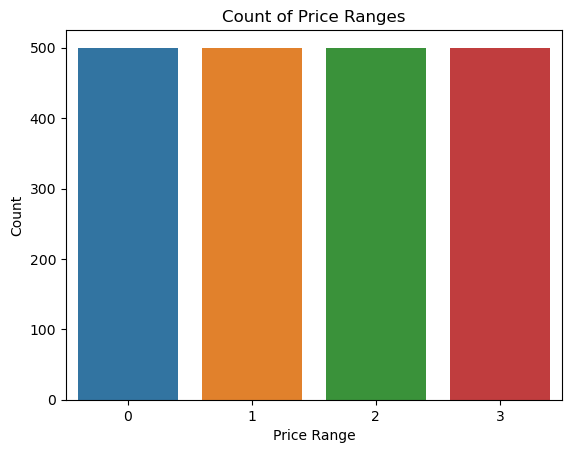

-------------------------------------------------------------------------------------------------------------------------------
1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


In [65]:
# checking the balanced of the target column
sns.countplot(x='price_range', data=df)
plt.title('Count of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()
print(127*'-')
print(df['price_range'].value_counts())

## the data is balance

## let's make a plot to see how each variable is related to the target 

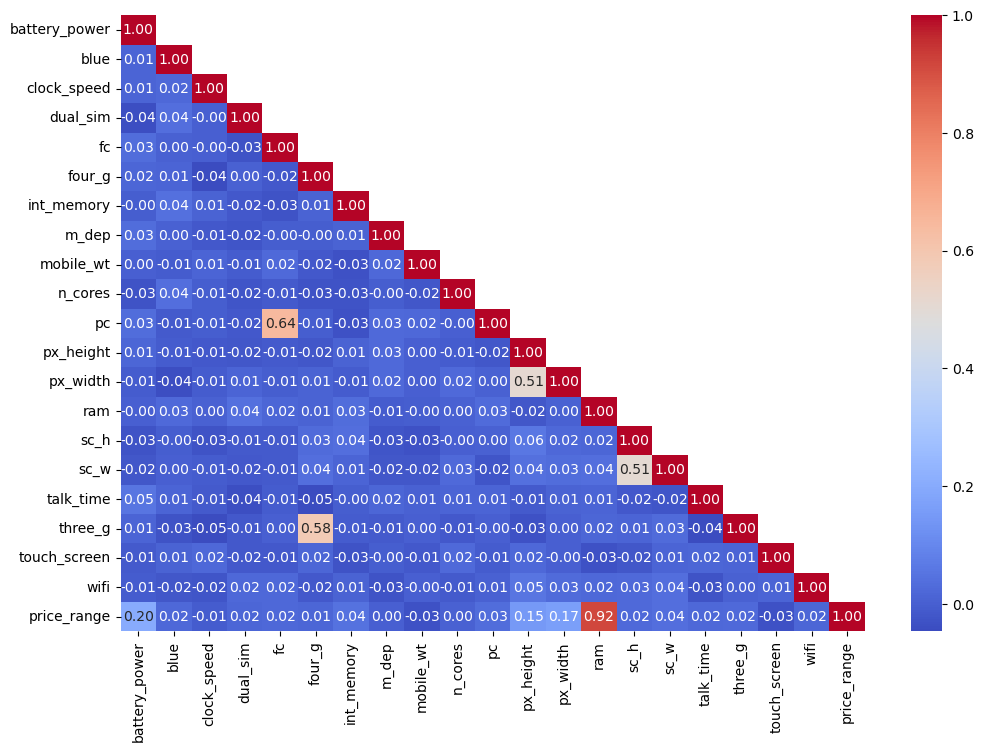

In [10]:
# creating a correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
# # Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones(correlation_matrix.shape), k=1)
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

# Display the plot
plt.show()

In [11]:
# sorting the correlation values by price range
correlation_matrix.sort_values(by = 'price_range' ,ascending = False).iloc[0].sort_values(ascending = False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

## Ram is the main feature that detecting the range of the price then the battery power

## let's see how does each feature is affect on the Target? 

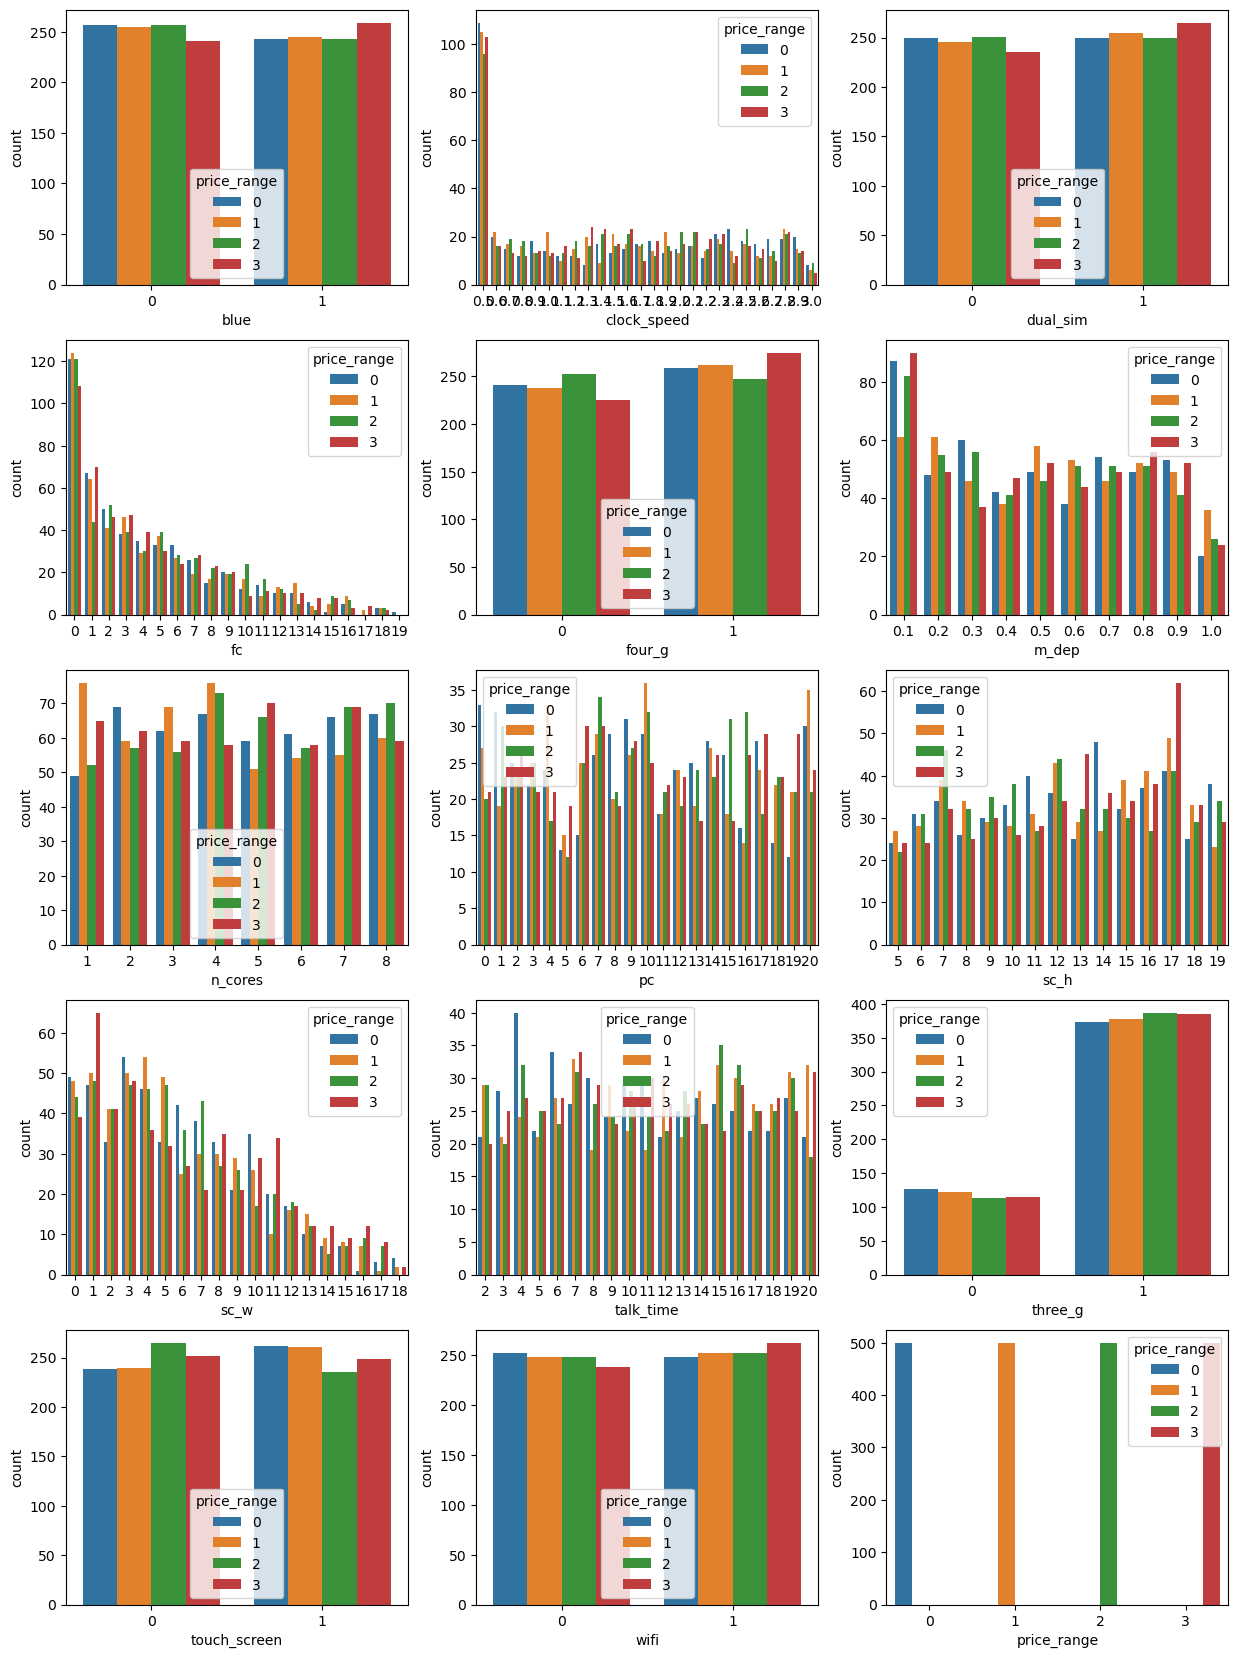

In [12]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df,hue='price_range')
    i +=1

## let's see how each feature is distributed

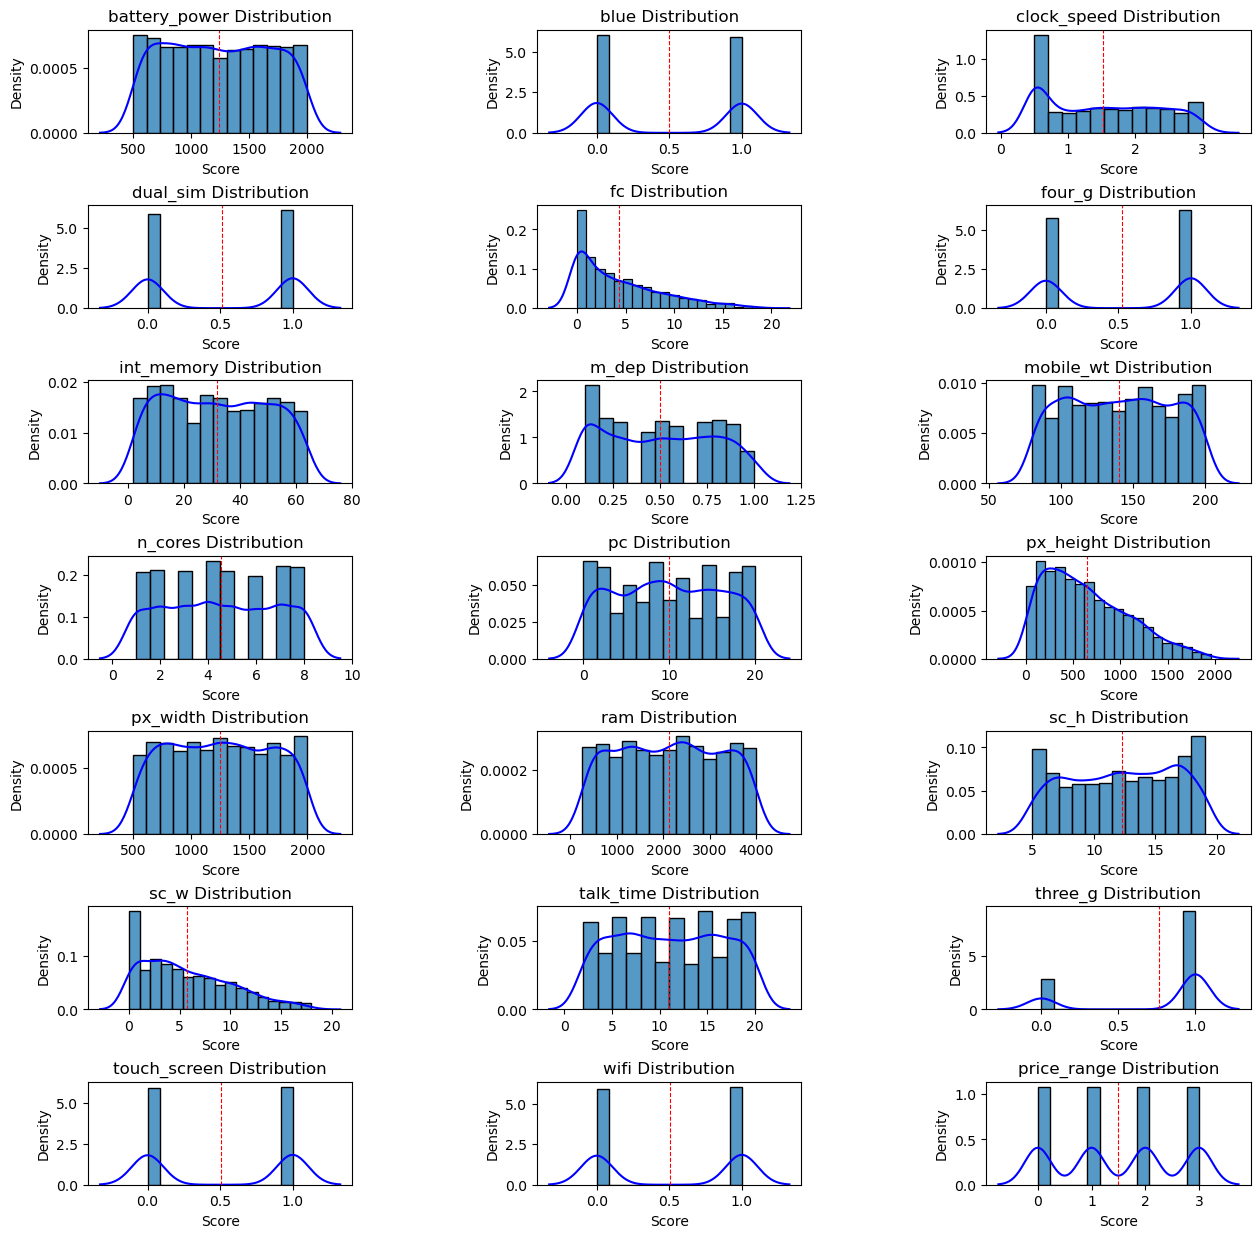

In [13]:
num_features = df.columns  # You can specify your columns as needed

# Define the number of columns for subplots
num_cols = 3
# Calculate the number of rows required for subplots
num_rows = (len(num_features) + num_cols - 1) // num_cols
# make spaces between graphs so they won't overlap
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15)
                        , gridspec_kw={'wspace': 0.7, 'hspace': 0.7})

plt.subplots_adjust(wspace=0.5, hspace=0.5) 

for i, column_name in enumerate(num_features):
    row = i // num_cols
    col = i % num_cols

    ax = axes[row][col]

    sns.histplot(df[column_name], stat='density', ax=ax)
    sns.kdeplot(df[column_name], color='blue', ax=ax)
    ax.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
    min_ylim, max_ylim = ax.get_ylim()
    ax.set_title(f'{column_name} Distribution')
    ax.set_xlabel("Score")
    ax.set_ylabel("Density")

# Hide any empty subplots
for i in range(len(num_features), num_cols * num_rows):
    fig.delaxes(axes[i // num_cols][i % num_cols])

plt.show()


## let's make our first model

### 1) Logistic Regression

In [14]:
# preparing our data to fit the model
X = df.drop('price_range', axis = 1)
y = df['price_range']


In [15]:
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 , stratify = y , random_state = 42)

In [16]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:64.125
Test Set Accuracy:60.0

Confusion Matrix:
[[81 14  0  0]
 [18 50 28  1]
 [ 1 29 43 33]
 [ 0  7 29 66]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        95
           1       0.50      0.52      0.51        97
           2       0.43      0.41      0.42       106
           3       0.66      0.65      0.65       102

    accuracy                           0.60       400
   macro avg       0.60      0.61      0.60       400
weighted avg       0.60      0.60      0.60       400



## from the above warning we need to make a scaler because our model is sensetive to the scale of input features

In [18]:
# scaling our data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [20]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:97.75
Test Set Accuracy:96.25

Confusion Matrix:
[[98  1  0  0]
 [ 2 96  2  0]
 [ 0  3 93  2]
 [ 0  0  5 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.96      0.96      0.96       100
           2       0.93      0.95      0.94        98
           3       0.98      0.95      0.97       103

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## our accuracy increased due to scaling our data 

### Let's creat a KNN

In [21]:
# Define a range of values for k
k_values = list(range(1, 21))  
# Initialize variables to keep track of the best k and its corresponding accuracy
best_k = 0
best_accuracy = 0

# Iterate over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'k={k}, Accuracy: {accuracy * 100:.2f}%')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f'Best k: {best_k}, Best Accuracy: {best_accuracy * 100:.2f}%')


k=1, Accuracy: 92.25%
k=2, Accuracy: 92.00%
k=3, Accuracy: 93.75%
k=4, Accuracy: 92.50%
k=5, Accuracy: 93.50%
k=6, Accuracy: 93.00%
k=7, Accuracy: 94.25%
k=8, Accuracy: 94.75%
k=9, Accuracy: 95.75%
k=10, Accuracy: 95.00%
k=11, Accuracy: 95.25%
k=12, Accuracy: 95.00%
k=13, Accuracy: 95.00%
k=14, Accuracy: 94.50%
k=15, Accuracy: 94.25%
k=16, Accuracy: 94.00%
k=17, Accuracy: 94.00%
k=18, Accuracy: 94.25%
k=19, Accuracy: 94.50%
k=20, Accuracy: 95.00%
Best k: 9, Best Accuracy: 95.75%


In [22]:
# creating our model and see the report 
knnm = KNeighborsClassifier(n_neighbors=9)
knnm.fit(X_train,y_train)
knnm.score(X_test,y_test)
y_knn_pred = knnm.predict(X_test)
print("Test Set Accuracy:"+str(accuracy_score(y_knn_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_knn_pred,y_test))
print(classification_report(y_test,y_knn_pred))

Test Set Accuracy:95.75

Confusion Matrix:
[[100   1   0   0]
 [  0  95   5   0]
 [  0   4  91   3]
 [  0   0   4  97]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       0.95      0.95      0.95       100
           2       0.93      0.91      0.92       100
           3       0.96      0.97      0.97       100

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Creating a Decision Tree Model

In [23]:
# Initialize variables to keep track of the best max_depth and its corresponding accuracy
best_max_depth = 0
best_accuracy = 0
# Define a range of values for max_depth
max_depth_values = list(range(1, 21))  # You can adjust the range as needed

# Iterate over different values of max_depth
for max_depth in max_depth_values:
    dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'max_depth={max_depth}, Accuracy: {accuracy * 100:.2f}%')

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

print(f'Best max_depth: {best_max_depth}, Best Accuracy: {best_accuracy * 100:.2f}%')

max_depth=1, Accuracy: 50.00%
max_depth=2, Accuracy: 74.25%
max_depth=3, Accuracy: 74.50%
max_depth=4, Accuracy: 79.00%
max_depth=5, Accuracy: 83.00%
max_depth=6, Accuracy: 84.50%
max_depth=7, Accuracy: 83.25%
max_depth=8, Accuracy: 84.75%
max_depth=9, Accuracy: 85.25%
max_depth=10, Accuracy: 82.75%
max_depth=11, Accuracy: 84.25%
max_depth=12, Accuracy: 86.00%
max_depth=13, Accuracy: 83.25%
max_depth=14, Accuracy: 83.50%
max_depth=15, Accuracy: 84.25%
max_depth=16, Accuracy: 84.00%
max_depth=17, Accuracy: 84.50%
max_depth=18, Accuracy: 83.50%
max_depth=19, Accuracy: 85.50%
max_depth=20, Accuracy: 86.00%
Best max_depth: 12, Best Accuracy: 86.00%


In [24]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       100
           1       0.81      0.83      0.82       100
           2       0.78      0.85      0.81       100
           3       0.94      0.85      0.89       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



## let's see a Random Forest

In [25]:
# Initialize variables to keep track of the best hyperparameters and their corresponding accuracy
best_n_estimators = 0
best_max_depth = 0
best_accuracy = 0

# Define a range of values for n_estimators and max_depth
n_estimators_values = [10, 50, 100, 150, 200]
max_depth_values = [None, 10, 20, 30, 40]

# Iterate over different combinations of n_estimators and max_depth
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        rf_classifier.fit(X_train, y_train)
        y_pred = rf_classifier.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f'n_estimators={n_estimators}, max_depth={max_depth}, Accuracy: {accuracy * 100:.2f}%')

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

print(f'Best n_estimators: {best_n_estimators}, Best max_depth: {best_max_depth}, Best Accuracy: {best_accuracy * 100:.2f}%')
print(classification_report(y_test,y_pred))

n_estimators=10, max_depth=None, Accuracy: 80.00%
n_estimators=10, max_depth=10, Accuracy: 75.00%
n_estimators=10, max_depth=20, Accuracy: 80.00%
n_estimators=10, max_depth=30, Accuracy: 80.00%
n_estimators=10, max_depth=40, Accuracy: 80.00%
n_estimators=50, max_depth=None, Accuracy: 86.50%
n_estimators=50, max_depth=10, Accuracy: 88.50%
n_estimators=50, max_depth=20, Accuracy: 86.50%
n_estimators=50, max_depth=30, Accuracy: 86.50%
n_estimators=50, max_depth=40, Accuracy: 86.50%
n_estimators=100, max_depth=None, Accuracy: 88.00%
n_estimators=100, max_depth=10, Accuracy: 89.00%
n_estimators=100, max_depth=20, Accuracy: 88.25%
n_estimators=100, max_depth=30, Accuracy: 88.00%
n_estimators=100, max_depth=40, Accuracy: 88.00%
n_estimators=150, max_depth=None, Accuracy: 87.25%
n_estimators=150, max_depth=10, Accuracy: 88.00%
n_estimators=150, max_depth=20, Accuracy: 87.50%
n_estimators=150, max_depth=30, Accuracy: 87.25%
n_estimators=150, max_depth=40, Accuracy: 87.25%
n_estimators=200, max_

In [26]:
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred,y_test))


Confusion Matrix:
[[95  6  0  0]
 [ 5 84 15  0]
 [ 0 10 79  7]
 [ 0  0  6 93]]


## Now let's creat a SVC Model

In [30]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'gamma': [0.001, 0.01, 0.1, 1]
}

# Create the SVC model
svc = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new SVC model with the best parameters
best_svc = SVC(**best_params)

# Fit the best model to the training data
best_svc.fit(X_train, y_train)

# Predict using the best model
y_pred_best_svc = best_svc.predict(X_test)

# Calculate accuracy
accuracy_best_svc = metrics.accuracy_score(y_test, y_pred_best_svc)
print("Best Accuracy:", accuracy_best_svc)

Best Accuracy: 0.975


In [32]:
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_pred_best_svc,y_test))
print(classification_report(y_test,y_pred_best_svc))


Confusion Matrix:
[[100   1   0   0]
 [  0  97   0   0]
 [  0   2  97   4]
 [  0   0   3  96]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.97      0.98       100
           2       0.94      0.97      0.96       100
           3       0.97      0.96      0.96       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.98       400



## let's create Gradient Boosting Model

In [36]:
import xgboost as xgb

# Create a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()

# Define a smaller parameter grid for hyperparameter tuning
param_grid = {
  'n_estimators': [50, 100], # Number of boosting stages to be used
  'learning_rate': [0.01, 0.1], # The step size shrinkage to prevent overfitting
  'max_depth': [3, 4, 5] # Maximum depth of the individual trees
}

# Create a GridSearchCV object with fewer cross-validation folds
grid_search = GridSearchCV(gb_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new Gradient Boosting model with the best parameters using XGBoost
best_gb_classifier = xgb.XGBClassifier(**best_params)

# Fit the best model to the training data
best_gb_classifier.fit(X_train, y_train)

# Predict using the best model
y_pred_best_gb = best_gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_best_gb = metrics.accuracy_score(y_test, y_pred_best_gb)
print("Best Accuracy:", accuracy_best_gb)


Best Accuracy: 0.9325


## it seems like the SVC is the best model

### let's try this model on a test file

In [46]:
df_t = pd.read_csv(r"D:\Data\test.csv")

In [47]:
df_t.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [48]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [49]:
# dropping id column to make it like the training data
df_t.drop(columns = 'id' ,inplace = True)

In [51]:
# Predicted Price Range from SVC Model
df_t['price range'] = best_svc.predict(df_t)

In [54]:
df_t

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


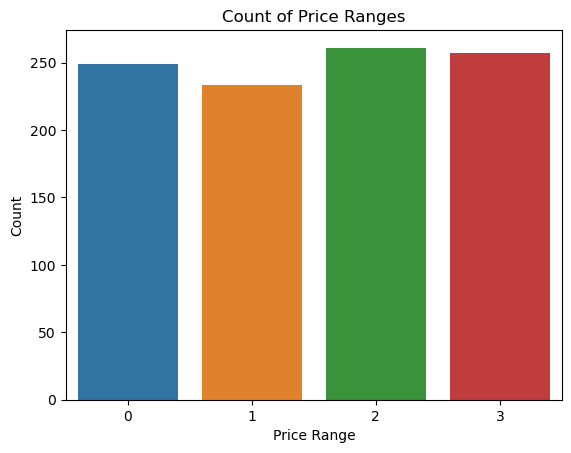

-------------------------------------------------------------------------------------------------------------------------------
2    261
3    257
0    249
1    233
Name: price range, dtype: int64


In [64]:
sns.countplot(x='price range', data=df_t)
plt.title('Count of Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()
print(127*'-')
print(df_t['price range'].value_counts())